In [1]:
from flask import Flask, request, jsonify
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from datetime import datetime, timedelta
import time

In [2]:
app = Flask(__name__)

In [3]:
df = pd.read_csv("dataset.csv")

In [4]:
print("\n-------------Veriseti Örneği-------------\n")
print(df.sample(10))
print("\n-------------Veriseti Bilgisi-------------\n")
print(df.info())


-------------Veriseti Örneği-------------

                                                 payload label
20763                                             tahsin  norm
18911                                    escudero ostria  norm
6018                    kirland-lincovsky@la-sexta-f1.fo  norm
5133                                                3596  norm
13821  1') where 2928=2928;create or replace function...  anom
16224  -8612') as toeu where 6357=6357 or 1570=conver...  anom
26466                                        2.94331E+14  norm
24832                                            mediona  norm
1614                                              ibarra  norm
24304                                            menelao  norm

-------------Veriseti Bilgisi-------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31067 entries, 0 to 31066
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   payload  31067 non-null  object

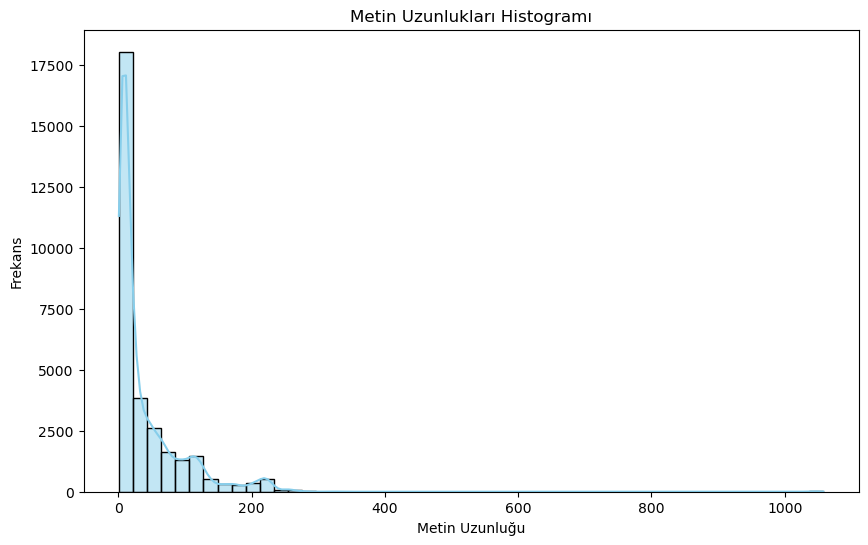

In [5]:
# Metin uzunluklarına ait histogram
df['text_length'] = df['payload'].apply(len)

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50, kde=True, color='skyblue')
plt.title('Metin Uzunlukları Histogramı')
plt.xlabel('Metin Uzunluğu')
plt.ylabel('Frekans')
plt.show()


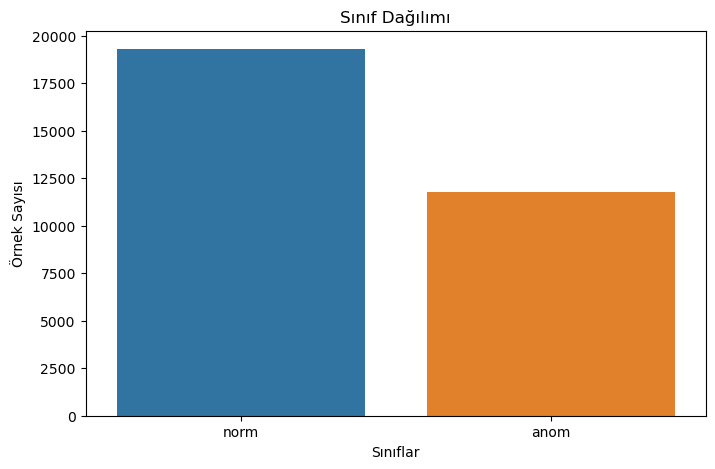

In [6]:
# Sınıf dağılımını gösteren bir çubuk grafiği
plt.figure(figsize=(8, 5))
sns.countplot(x='label', data=df)
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıflar')
plt.ylabel('Örnek Sayısı')
plt.show()

In [7]:
# Veriyi eğitim ve test setlerine böl
X_train, X_test, y_train, y_test = train_test_split(df['payload'], df['label'], test_size=0.2, random_state=42)

In [8]:
# Modeli oluştur
start_time = time.time()
model1 = make_pipeline(TfidfVectorizer(), MultinomialNB())
model1.fit(X_train, y_train)
end_time = time.time()
elapsed_time1 = end_time - start_time
print("\n-------------MultinomialNB Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time1)
print("Eğitim verisi skoru: ", model1.score(X_train, y_train))


-------------MultinomialNB Modeli-------------

Eğitim süresi:  0.4324519634246826
Eğitim verisi skoru:  0.9976260411217962


In [9]:
start_time = time.time()
model2 = make_pipeline(TfidfVectorizer(), LogisticRegression())
model2.fit(X_train, y_train)
end_time = time.time()
elapsed_time2 = end_time - start_time
print("\n-------------LogisticRegression Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time2)
print("Eğitim verisi skoru: ", model2.score(X_train, y_train))


-------------LogisticRegression Modeli-------------

Eğitim süresi:  1.110652208328247
Eğitim verisi skoru:  0.984911278316501


In [10]:
start_time = time.time()
model3 = make_pipeline(TfidfVectorizer(), SVC(kernel='linear'))
model3.fit(X_train, y_train)
end_time = time.time()
elapsed_time3 = end_time - start_time
print("\n-------------SVC Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time3)
print("Eğitim verisi skoru: ", model3.score(X_train, y_train))


-------------SVC Modeli-------------

Eğitim süresi:  42.254188537597656
Eğitim verisi skoru:  0.99959763408844


In [11]:
start_time = time.time()
model4 = make_pipeline(TfidfVectorizer(), RandomForestClassifier())
model4.fit(X_train, y_train)
end_time = time.time()
elapsed_time4 = end_time - start_time
print("\n-------------RandomForestClassifier Modeli-------------\n")
print("Eğitim süresi: ", elapsed_time4)
print("Eğitim verisi skoru: ", model4.score(X_train, y_train))


-------------RandomForestClassifier Modeli-------------

Eğitim süresi:  81.99573755264282
Eğitim verisi skoru:  0.999879290226532


In [12]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred1 = model1.predict(X_test)
end_time = time.time()
predict_elapsed_time1 = end_time - start_time
print("\n-------------Test Seti Üzerinden Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred1))
print("Tahmin süresi: ", predict_elapsed_time1)


-------------Test Seti Üzerinden Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       0.96      0.99      0.98      2339
        norm       1.00      0.98      0.99      3875

    accuracy                           0.98      6214
   macro avg       0.98      0.99      0.98      6214
weighted avg       0.98      0.98      0.98      6214

Tahmin süresi:  0.07355761528015137


In [13]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred2 = model2.predict(X_test)
end_time = time.time()
predict_elapsed_time2 = end_time - start_time
print("\n-------------Test Seti Üzerinden Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred2))
print("Tahmin süresi: ", predict_elapsed_time2)


-------------Test Seti Üzerinden Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       1.00      0.97      0.98      2339
        norm       0.98      1.00      0.99      3875

    accuracy                           0.99      6214
   macro avg       0.99      0.98      0.99      6214
weighted avg       0.99      0.99      0.99      6214

Tahmin süresi:  0.07442331314086914


In [14]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred3 = model3.predict(X_test)
end_time = time.time()
predict_elapsed_time3 = end_time - start_time
print("\n-------------Test Seti Üzerinden Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred3))
print("Tahmin süresi: ", predict_elapsed_time3)


-------------Test Seti Üzerinden Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       1.00      1.00      1.00      2339
        norm       1.00      1.00      1.00      3875

    accuracy                           1.00      6214
   macro avg       1.00      1.00      1.00      6214
weighted avg       1.00      1.00      1.00      6214

Tahmin süresi:  2.0793545246124268


In [15]:
# Test seti üzerinde modeli değerlendir
start_time = time.time()
y_pred4 = model4.predict(X_test)
end_time = time.time()
predict_elapsed_time4 = end_time - start_time
print("\n-------------Test Seti Üzerinden Model Değerlendirmesi-------------\n")
print(metrics.classification_report(y_test, y_pred4))
print("Tahmin süresi: ", predict_elapsed_time4)


-------------Test Seti Üzerinden Model Değerlendirmesi-------------

              precision    recall  f1-score   support

        anom       1.00      1.00      1.00      2339
        norm       1.00      1.00      1.00      3875

    accuracy                           1.00      6214
   macro avg       1.00      1.00      1.00      6214
weighted avg       1.00      1.00      1.00      6214

Tahmin süresi:  13.116774320602417


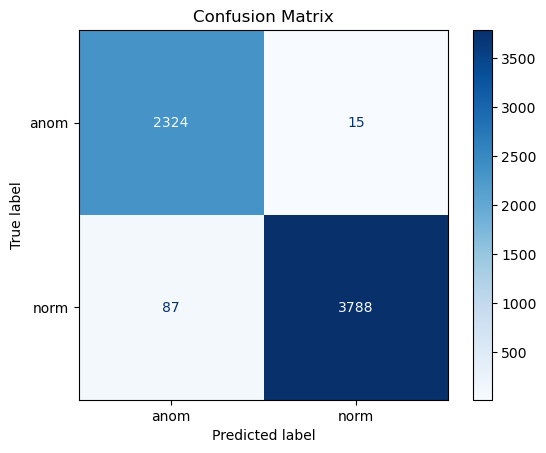

In [16]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred1, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

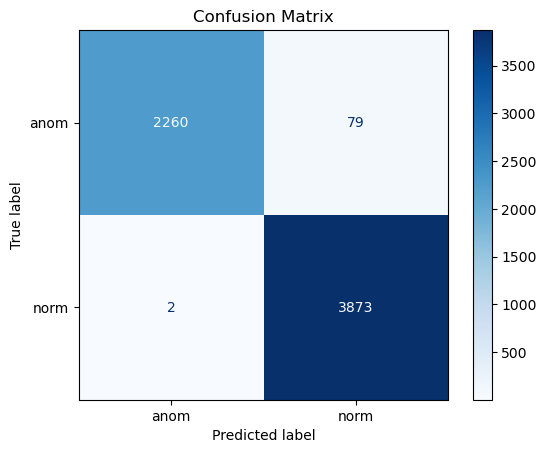

In [17]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred2, labels=model2.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

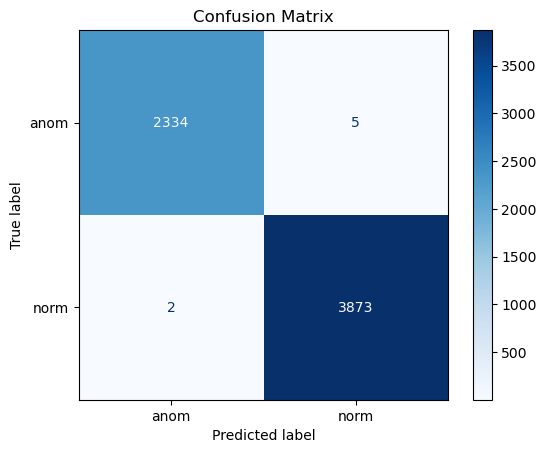

In [18]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred3, labels=model3.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model3.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

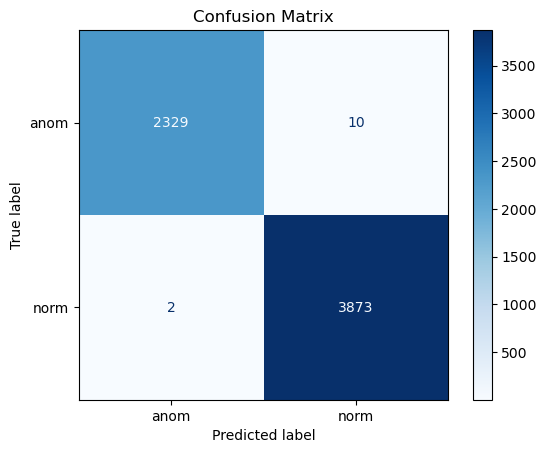

In [19]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred4, labels=model4.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model4.classes_)
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.show()

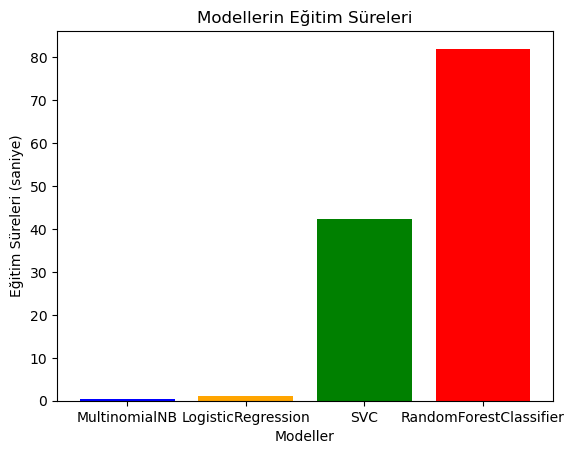

In [20]:
# Dört modelin eğitim süreleri (örnek veri)
model_names = ["MultinomialNB", "LogisticRegression", "SVC", "RandomForestClassifier"]
training_times = [elapsed_time1, elapsed_time2, elapsed_time3, elapsed_time4]  # Bu süreler sizin elinizdeki verilere göre olmalı

# Eğitim sürelerini görselleştir
plt.bar(model_names, training_times, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('Eğitim Süreleri (saniye)')
plt.title('Modellerin Eğitim Süreleri')
plt.show()

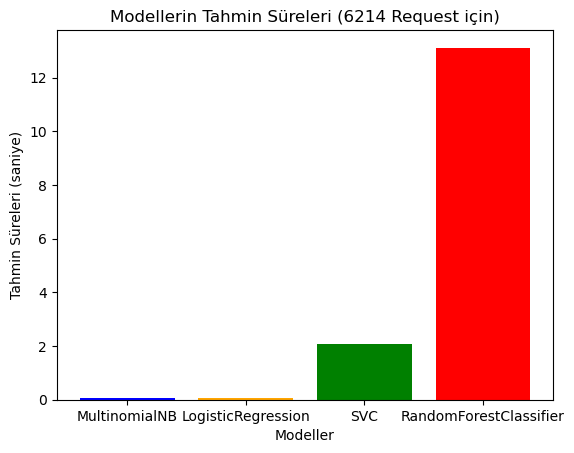

In [21]:
# Dört modelin tahmin süreleri (örnek veri)
model_names = ["MultinomialNB", "LogisticRegression", "SVC", "RandomForestClassifier"]
training_times = [predict_elapsed_time1, predict_elapsed_time2, predict_elapsed_time3, predict_elapsed_time4]  # Bu süreler sizin elinizdeki verilere göre olmalı

# Eğitim sürelerini görselleştir
plt.bar(model_names, training_times, color=['blue', 'orange', 'green', 'red'])
plt.xlabel('Modeller')
plt.ylabel('Tahmin Süreleri (saniye)')
plt.title('Modellerin Tahmin Süreleri (6214 Request için)')
plt.show()

In [22]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request1', methods=['POST'])
def analyze_request1():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model1.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [23]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request2', methods=['POST'])
def analyze_request2():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model2.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [24]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request3', methods=['POST'])
def analyze_request3():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model3.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [25]:
# Gerçek zamanlı analiz için endpoint
@app.route('/analyze_request4', methods=['POST'])
def analyze_request4():
    # Gelen isteği al
    client_ip = request.remote_addr
    request_text = request.get_data(as_text=True)

    # Modeli kullanarak analiz yap
    prediction = model4.predict([request_text])
    is_malicious = prediction[0] == 'anom'

    # Uyarı veya bilgi mesajını döndür
    if is_malicious:
        return jsonify({'message': 'Uyari: Potansiyel guvenlik tehdidi tespit edildi!', 'ip': client_ip})
    else:
        return jsonify({'message': 'Normal istek: Guvenli.', 'ip': client_ip})

In [26]:
# Web sunucuyu başlatma
if __name__ == '__main__':
    app.run(port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit


In [ ]:
### Test için curl komutları
# curl -X POST http://localhost:5000/analyze_request1 -d "SELECT * FROM users WHERE id = 1"
# curl -X POST http://localhost:5000/analyze_request1 -d "SELECT * FROM users WHERE id = 1 OR 1=1"
# curl -X POST http://localhost:5000/analyze_request1 -d "SELECT * FROM users WHERE id = 1; DROP TABLE users"
# curl -X POST http://localhost:5000/analyze_request1 -d "hasan@hotmail.com"